In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Standardisasi

In [2]:
df = pd.read_excel('STANDARIZATION.xlsx', 
                    skipfooter=7,
                    skiprows=1)
df

,TB (m),BB (kg),(TB - AvgTB)2,(BB - AvgBB)2,Standardization (Z) TB,Standardization (Z) BB,Z TB,Z BB,INVERS (X = Z * s + avgX),INVERS (Y = Z * s + avgY),Z TB P,Z BB P,Min-Max Scaler NTB,Min-Max Scaler NBB
0,0.80,20,0.005476,36,-1.196248,-1.510526,-1.196248,-1.510526,0.80,20,-1.260957,-1.592235,0.00,0.0
1,0.85,25,0.000576,1,-0.387972,-0.251754,-0.387972,-0.251754,0.85,25,-0.408959,-0.265372,0.25,0.5
2,0.92,21,0.002116,25,0.743614,-1.258772,0.743614,-1.258772,0.92,21,0.783838,-1.326862,0.60,0.1
3,0.88,29,0.000036,9,0.096993,0.755263,0.096993,0.755263,0.88,29,0.102240,0.796117,0.40,0.9
4,0.82,30,0.002916,16,-0.872938,1.007018,-0.872938,1.007018,0.82,30,-0.920158,1.061490,0.10,1.0
5,0.86,21,0.000196,25,-0.226317,-1.258772,-0.226317,-1.258772,0.86,21,-0.238559,-1.326862,0.30,0.1
6,0.87,28,0.000016,4,-0.064662,0.503509,-0.064662,0.503509,0.87,28,-0.068160,0.530745,0.35,0.8
7,0.93,27,0.003136,1,0.905269,0.251754,0.905269,0.251754,0.93,27,0.954237,0.265372,0.65,0.7
8,0.81,29,0.004096,9,-1.034593,0.755263,-1.034593,0.755263,0.81,29,-1.090557,0.796117,0.05,0.9
9,1.00,30,0.015876,16,2.036856,1.007018,2.036856,1.007018,1.00,30,2.147034,1.061490,1.00,1.0


In [3]:
df = df.iloc[:,:2]
#df = df[['TB (m)', 'BB (kg)']]
df

,TB (m),BB (kg)
0,0.80,20
1,0.85,25
2,0.92,21
3,0.88,29
4,0.82,30
5,0.86,21
6,0.87,28
7,0.93,27
8,0.81,29
9,1.00,30


<hr>

## Standarisasi Formula

Standarisasi $\displaystyle z=\frac {X-\bar{X}} {s} $
dengan standard deviasi 
$\displaystyle s = \sqrt{\frac{\sum(x-\bar{x})^2}{n-1}} $

- high outlier jika $ z_{score} >2.5 $
- low outlier jika $ z_{score} < -2.5 $
- Data terstandarisasi mean ~ 0 dan std ~1

In [21]:
df['TB (m)'].std()

0.06186005711819757

In [24]:
print(np.std(df['TB (m)']))
np.std(df['TB (m)'], ddof=1) 
#delta degree of fredom -- feature nya -- kalau di excel sama pandas ddof=  1. kalau di sklearn dan numpy defualtnya ddof= 0

0.05868560300448484


0.06186005711819757

In [27]:
df['Z TB S'] = (df['TB (m)'] - df['TB (m)'].mean())/df['TB (m)'].std()
df['Z TB P'] = (df['TB (m)'] - df['TB (m)'].mean())/np.std(df['TB (m)'])
df['Z BB S'] = (df['BB (kg)'] - df['BB (kg)'].mean())/df['BB (kg)'].std()
df['Z BB P'] = (df['BB (kg)'] - df['BB (kg)'].mean())/np.std(df['BB (kg)'])
df

,TB (m),BB (kg),Z TB S,Z TB P,Z BB S,Z BB P
0,0.80,20,-1.196248,-1.260957,-1.510526,-1.592235
1,0.85,25,-0.387972,-0.408959,-0.251754,-0.265372
2,0.92,21,0.743614,0.783838,-1.258772,-1.326862
3,0.88,29,0.096993,0.102240,0.755263,0.796117
4,0.82,30,-0.872938,-0.920158,1.007018,1.061490
5,0.86,21,-0.226317,-0.238559,-1.258772,-1.326862
6,0.87,28,-0.064662,-0.068160,0.503509,0.530745
7,0.93,27,0.905269,0.954237,0.251754,0.265372
8,0.81,29,-1.034593,-1.090557,0.755263,0.796117
9,1.00,30,2.036856,2.147034,1.007018,1.061490


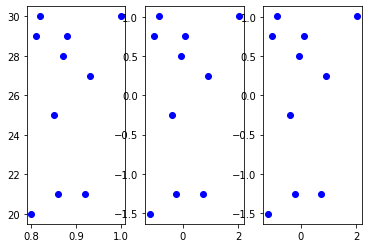

In [35]:
plt.subplot(131)
plt.plot(df['TB (m)'], df['BB (kg)'], 'bo')
plt.subplot(132)
plt.plot(df['Z TB S'], df['Z BB S'], 'bo')
plt.subplot(133)
plt.plot(df['Z TB S'], df['Z BB S'], 'bo')

## Standardisasi dengan SKLEARN

In [40]:
from sklearn.preprocessing import StandardScaler as ss
scalar1 = ss()
scalar1.fit(df[['TB (m)']])
ztb = scalar1.transform(df[['TB (m)']])
ztb

array([[-1.26095663],
       [-0.40895891],
       [ 0.7838379 ],
       [ 0.10223973],
       [-0.92015754],
       [-0.23855936],
       [-0.06815982],
       [ 0.95423745],
       [-1.09055708],
       [ 2.14703426]])

In [41]:
scalar2 = ss()
scalar2.fit(df[['BB (kg)']])
zbb = scalar2.transform(df[['BB (kg)']])
zbb

array([[-1.59223468],
       [-0.26537245],
       [-1.32686223],
       [ 0.79611734],
       [ 1.06148978],
       [-1.32686223],
       [ 0.53074489],
       [ 0.26537245],
       [ 0.79611734],
       [ 1.06148978]])

In [43]:
df['Z TB SK'] = ztb
df['Z BB SK'] = zbb

In [44]:
df

,TB (m),BB (kg),Z TB S,Z TB P,Z BB S,Z BB P,Z TB SK,Z BB SK
0,0.80,20,-1.196248,-1.260957,-1.510526,-1.592235,-1.260957,-1.592235
1,0.85,25,-0.387972,-0.408959,-0.251754,-0.265372,-0.408959,-0.265372
2,0.92,21,0.743614,0.783838,-1.258772,-1.326862,0.783838,-1.326862
3,0.88,29,0.096993,0.102240,0.755263,0.796117,0.102240,0.796117
4,0.82,30,-0.872938,-0.920158,1.007018,1.061490,-0.920158,1.061490
5,0.86,21,-0.226317,-0.238559,-1.258772,-1.326862,-0.238559,-1.326862
6,0.87,28,-0.064662,-0.068160,0.503509,0.530745,-0.068160,0.530745
7,0.93,27,0.905269,0.954237,0.251754,0.265372,0.954237,0.265372
8,0.81,29,-1.034593,-1.090557,0.755263,0.796117,-1.090557,0.796117
9,1.00,30,2.036856,2.147034,1.007018,1.061490,2.147034,1.061490


In [45]:
invTB = scalar1.inverse_transform(df['Z TB SK'])
invTB

array([0.8 , 0.85, 0.92, 0.88, 0.82, 0.86, 0.87, 0.93, 0.81, 1.  ])

In [46]:
invBB = scalar2.inverse_transform(df['Z BB SK'])
invBB

array([20., 25., 21., 29., 30., 21., 28., 27., 29., 30.])

<hr>

### 1. Normalisasi

- Normalisasi $\displaystyle x' = \frac {x - x_{min}} {x_{max} - x_{min}}$

In [12]:
ntb = (df['TB (m)'] - df['TB (m)'].min())/((df['TB (m)']).max() - df['TB (m)'].min())
nbb = (df['BB (kg)'] - df['BB (kg)'].min())/((df['BB (kg)']).max() - df['BB (kg)'].min())

In [13]:
df['NTB M'] = ntb
df['NBB M'] = nbb
df

,TB (m),BB (kg),NTB M,NBB M
0,0.80,20,0.00,0.0
1,0.85,25,0.25,0.5
2,0.92,21,0.60,0.1
3,0.88,29,0.40,0.9
4,0.82,30,0.10,1.0
5,0.86,21,0.30,0.1
6,0.87,28,0.35,0.8
7,0.93,27,0.65,0.7
8,0.81,29,0.05,0.9
9,1.00,30,1.00,1.0


### 2. Normalisasi Sklearn minmax_scale

In [14]:
from sklearn.preprocessing import minmax_scale
df['NTB SK'] = minmax_scale(df['TB (m)'])
df['NBB SK'] = minmax_scale(df['BB (kg)'])
df

,TB (m),BB (kg),NTB M,NBB M,NTB SK,NBB SK
0,0.80,20,0.00,0.0,0.00,0.0
1,0.85,25,0.25,0.5,0.25,0.5
2,0.92,21,0.60,0.1,0.60,0.1
3,0.88,29,0.40,0.9,0.40,0.9
4,0.82,30,0.10,1.0,0.10,1.0
5,0.86,21,0.30,0.1,0.30,0.1
6,0.87,28,0.35,0.8,0.35,0.8
7,0.93,27,0.65,0.7,0.65,0.7
8,0.81,29,0.05,0.9,0.05,0.9
9,1.00,30,1.00,1.0,1.00,1.0


### 3. Normalisasi Sklearn minmaxscaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df[['TB (m)', 'BB (kg)']])
n = mms.transform(df[['TB (m)', 'BB (kg)']])

In [1]:
df['NTB mms'] = n[:,0]
df['NBB mms'] = n[:,1]
df

NameError: name 'n' is not defined